In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

Exercício 1a: Obtendo o negativo

In [ ]:
def exerc1a(img):
  img = img*-1 + 255
  print_img(img, "exerc1a")

Exercício 1b: Conversão de intervalo da intensidade

In [ ]:
def exerc1b(img):
  img = (img/2.55 + 100).astype(int)
  print_img(img, "exerc1b")

Exercício 2: Ajuste de Brilho

In [ ]:
def exerc2(img, gama):
  img = np.power(img, 1/gama)
  print_img(img, "exerc2")

Exercício 3: Quantização da Imagem

In [ ]:
def exerc3(img, n):
  if n > 8:
      print("Valor Inválido. n deve estar entre 1 e 8 (inclusive)")
      return
  max_pixel = img.max()
  n_aux = 2**n - 1
  img = np.round(img/max_pixel*n_aux)
  img = img*255/n_aux
  print_img(img, "exerc3")

Exercício 4: Plano de Bits

In [ ]:
def exerc4(img, n):
  if(n>=8 or n<0):
    print("Valor Inválido. n tem que estar entre 0 < n < 8")
    return
  img = np.uint8(img*250)

  layers = np.array([np.bitwise_and(img, np.array([2**i]*img.shape[1])) for i in range(8)])
  layers[layers>1] = 1

  print_img(layers[n], "exerc4")

  #versão primitiva:
  #img_2 = np.unpackbits((np.uint8(img*250)), axis=1)
  #matriz_identidade = np.eye(8)
  #a_layers = np.array([list(matriz_identidade[i])*img_2.shape[0] for i in range(8)])


Exercício 5: Mosaico

In [ ]:
def exerc5(img):
  img = (img*250).astype(int)
  layers = img[0:int(img.shape[0]/4),0:int(img.shape[1]/4)]
  img_quarto = int(img.shape[0] / 4)
  img_cinco_quartos = img.shape[0] + img_quarto
  layers = np.array([img[i-img_quarto:i,j-img_quarto:j] for i in range(img_quarto, img_cinco_quartos, img_quarto) for j in range(img_quarto, img_cinco_quartos, img_quarto)])

  print(layers.shape)
  #[print(layers[i].shape) for i in range(16)]
  #[print_img(layers[i]) for i in range(16)]

  indices = [(i,j) for i in range(img_quarto, img_cinco_quartos, img_quarto) for j in range(img_quarto, img_cinco_quartos, img_quarto)]

  nova_ordem = [5,10,12,2,7,15,0,8,11,13,1,6,3,14,9,4]
  result = np.zeros(img.shape)
  for i in range(16):
      result[indices[i][0]-img_quarto:indices[i][0],indices[i][1]-img_quarto:indices[i][1]] = layers[nova_ordem[i]]
      
  
  print_img(result, "exerc5")

  #versão

  # mask = np.ones(((int(img.shape[0]/4), int(img.shape[1]/4))))
  # grade = np.pad(mask, (0, img.shape[1]-mask.shape[1]), mode='constant')
  # print_img(grade)
  #
  # grade = np.pad(mask, (0, img.shape[1]-mask.shape[1]), mode='constant')
  # print_img(grade)
  #print(grade.shape)
  #print(mask.shape)

Exercício 6: Combinação de Imagens

In [ ]:
def exerc6(img1, img2, percentage):
  result = percentage*img1 + (1-percentage)*img2
  print_img(result, "exerc6")

Exercício 7: Filtragem de Imagens

In [ ]:
def exerc7(img, filtro):
  f = []
  if(filtro == 1):
    f = np.array([-1,-1,-1,-1,8,-1,-1,-1,-1])
  else:
    f = np.array([-1,-2,-1,0,0,0,1,2,1])
  
  img2 = img + 0  #para criar um filtro com bordas semelhantes á imagem original

  img2[1:-1, 1:-1] = np.sum([f[0]*img[:-2, :-2],f[1]*img[:-2, 1:-1],f[2]*img[:-2, 2:],f[3]*img[1:-1, :-2],f[4]*img[1:-1, 1:-1],f[5]*img[1:-1, 2:],f[6]*img[2:, :-2],f[7]*img[2:, 1:-1],f[8]*img[2:, 2:]], axis=0)

  img2[img2>255] = 255
  img2[img2<0] = 0

  print_img(img2, "exerc7")
  return

Exercício 8: Entropia

In [ ]:
def exerc8(img):
    histograma = plt.hist((img.ravel()*255).astype(int),bins=256,range=(0,255))
    peso_da_escala = histograma[0].astype(int)

    #Nesta próxima linha faço um list comprehension para iterar entre o len(peso_da_escala), que será 256, sempre somando 
    #o produto: pi * log(pi), e por causa dos casos em que pi == 0, tive de criar um if ternário para setar o valor deste 
    #elemento como zero.
    soma_pixels = peso_da_escala.sum()
    entropia = -np.array([(peso_da_escala[i]/soma_pixels)*np.log2(peso_da_escala[i]/soma_pixels) if peso_da_escala[i]>0 else 0 for i in range(len(peso_da_escala))]).sum()
    print(entropia)

    return

Função print e salva

In [ ]:
def print_img(img, nome_exerc):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    #plt.show()
    plt.savefig(nome_exerc + ".png")
    return

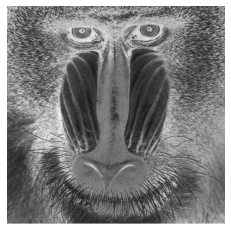

In [ ]:
def main():
  #Exemplo de inicialização de image -> matriz:
  img_baboon = (plt.imread("baboon.png")*255).astype(int) #Troque o nome "baboon.png" pelo path da imagem que você desejar
  img_butterfly = (plt.imread("butterfly.png")*255).astype(int)

  #Como acessar cada função:

  exerc1a(img_baboon)
  #exerc1b(img_baboon)
  #exerc2(img_baboon, 1.5)
  #exerc3(img_baboon, 4)
  #exerc4(img_baboon, 1)
  #exerc5(img_baboon)
  #exerc6(img_baboon, img_butterfly, 0.3)
  #exerc7(img_baboon, 1)
  #Por algum motivo este exerc8 não está funcionando após a transformação para int, para testá-lo usar somente plt.imread("baboon.png") e não o img_baboon 
  #exerc8(plt.imread("baboon.png"))
  return

main()